In [721]:
#dristributed evolutionary algorithms in python
from deap import creator, base, tools, algorithms
import numpy as np
import matplotlib.pyplot as plt

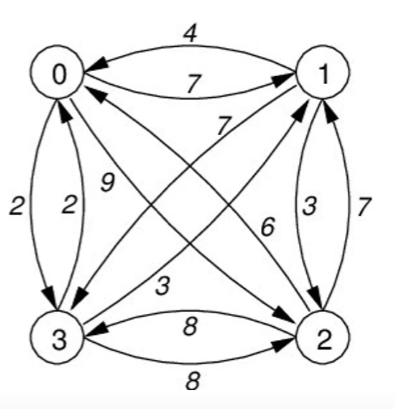

In [722]:
toolbox = base.Toolbox()
 
#genes, ou numero de cidades percorridas
n = 4

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("individuo", list, fitness=creator.FitnessMin)

toolbox.register("Genes", np.random.permutation, n)
toolbox.register("Individuos", tools.initIterate, creator.individuo, toolbox.Genes)


In [723]:
toolbox.register("Populacao", tools.initRepeat, list, toolbox.Individuos)

In [724]:
pop = toolbox.Populacao(n=10)

In [725]:
toolbox.register("mate", tools.cxPartialyMatched)
#[0, 1, 2, 3]
#[3, 0, 2, 1]
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=2)


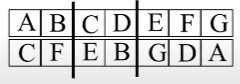

In [726]:
distancias =   [[0, 7, 9 ,2], 
                [4, 0, 3, 7],
                [6, 7, 0, 8],
                [2, 3, 8, 0]]

In [727]:
def aptidao(individual):
    distancia = 0
    for i in range(n-1):
        distancia += distancias[individual[i]][individual[i+1]]
    #distancia += distancias[individual[n-1]][individual[0]]
    return distancia,  

In [728]:
toolbox.register("evaluate", aptidao)

In [729]:
def estatisticaSalvar(individiuo):
    return individiuo.fitness.values

In [730]:
estatistica = tools.Statistics(key=estatisticaSalvar)
estatistica.register("mean", np.mean)
estatistica.register("min", np.min)
estatistica.register("max", np.max)

In [731]:
hof = tools.HallOfFame(1)

In [732]:
result, log = algorithms.eaSimple(pop, 
                                  toolbox, 
                                  cxpb=0.8, 
                                  mutpb=0.1, 
                                  ngen=100, 
                                  stats=estatistica, 
                                  halloffame=hof, 
                                  verbose=True)

gen	nevals	mean	min	max
0  	10    	18.2	12 	23 
1  	10    	15.6	8  	20 
2  	8     	13.2	12 	18 
3  	10    	12.7	12 	17 
4  	6     	12.2	12 	14 
5  	9     	12.6	12 	18 
6  	10    	12  	12 	12 
7  	8     	12  	12 	12 
8  	10    	12  	12 	12 
9  	10    	12  	12 	12 
10 	10    	12.8	12 	20 
11 	10    	13  	12 	18 
12 	9     	12.4	12 	16 
13 	8     	12  	12 	12 
14 	6     	12.8	12 	20 
15 	4     	12  	12 	12 
16 	6     	12  	12 	12 
17 	8     	12  	12 	12 
18 	8     	12.7	12 	19 
19 	8     	12  	12 	12 
20 	8     	12.4	12 	16 
21 	8     	12.4	12 	16 
22 	9     	12  	12 	12 
23 	9     	12  	12 	12 
24 	10    	12  	12 	12 
25 	10    	12  	12 	12 
26 	10    	11.6	8  	12 
27 	10    	10.8	8  	12 
28 	7     	11.2	8  	18 
29 	10    	9.6 	8  	12 
30 	10    	8.4 	8  	12 
31 	8     	8   	8  	8  
32 	10    	8.9 	8  	17 
33 	8     	8   	8  	8  
34 	8     	8.7 	8  	15 
35 	10    	8   	8  	8  
36 	10    	8   	8  	8  
37 	10    	9   	8  	18 
38 	6     	8   	8  	8  
39 	8     	8   	8  	8  
40 	8     	8   	

In [733]:
print(result)

[[0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2], [0, 3, 1, 2]]


In [734]:
print(f"Hall da fama: {hof}")
melhor = hof[0]
print(aptidao(melhor))

Hall da fama: [[0, 3, 1, 2]]
(8,)


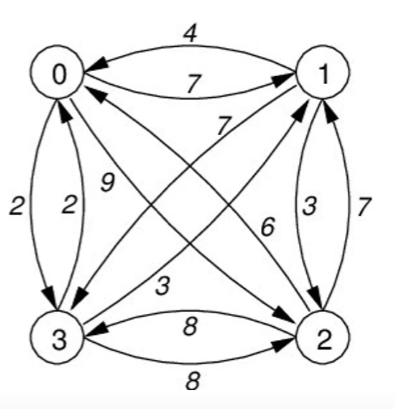

In [735]:
menores = log.select('min')
maiores = log.select('max')
media = log.select('mean')

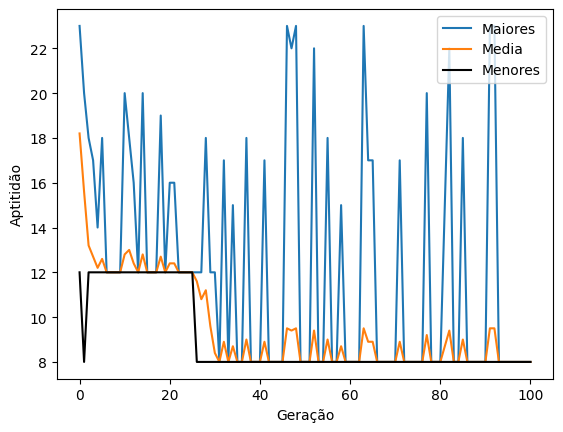

In [736]:
plt.plot(maiores, label="Maiores")
plt.plot(media, label="Media") 
plt.plot(menores, color="black", label="Menores")

plt.xlabel("Geração")
plt.ylabel("Aptitidão")
plt.legend(loc=1)